In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [2]:
# 20 nodes JSRUN
exp1_sessions = pd.read_csv('../data/exp1/sessions.csv', index_col=0)
exp1_pilots = pd.read_csv('../data/exp1/pilots.csv', index_col=0)
exp1_units = pd.read_csv('../data/exp1/units.csv', index_col=0)

# 6 iterations JSRUN
exp2_sessions = pd.read_csv('../data/exp2/sessions.csv', index_col=0)
exp2_pilots = pd.read_csv('../data/exp2/pilots.csv', index_col=0)
exp2_units = pd.read_csv('../data/exp2/units.csv', index_col=0)

# 100ns, 50ps, 6 runs JSRUN
exp3_sessions = pd.read_csv('../data/exp3/sessions.csv', index_col=0)
exp3_pilots = pd.read_csv('../data/exp3/pilots.csv', index_col=0)
exp3_units = pd.read_csv('../data/exp3/units.csv', index_col=0)

In [3]:
# Cleanup spurious runs
# exp4_sessions.drop('rp.session.login4.mturilli1.018122.0001', axis=0, inplace=True)
# exp4_sessions.drop('rp.session.login4.mturilli1.018122.0000', axis=0, inplace=True)
# exp4_sessions.drop('rp.session.login4.mturilli1.018127.0003', axis=0, inplace=True)

In [4]:
print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp1_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp1_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp1_units.shape[0]

print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp2_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp2_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp2_units.shape[0]

print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp3_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp3_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp3_units.shape[0]

Experiment 1: Baseline: Total number of successful runs: 1
Experiment 1: Baseline: Total number of pilots: 1
Experiment 1: Baseline: Total number of units: 736

Experiment 1: Baseline: Total number of successful runs: 1
Experiment 1: Baseline: Total number of pilots: 1
Experiment 1: Baseline: Total number of units: 731

Experiment 1: Baseline: Total number of successful runs: 1
Experiment 1: Baseline: Total number of pilots: 1
Experiment 1: Baseline: Total number of units: 731



In [5]:
exp1_sessions['nnode'] = exp1_sessions.ncore/168
exp1_sessions['list'] = exp1_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp1_sessions['nunitnode'] = exp1_sessions['list'].apply('/'.join)

exp1_ws = exp1_sessions[['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
                         'cu_exec_start_stop','nunit_failed']
                       ].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp1_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp1_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp1_ws = exp1_ws.sort_values("nunit")
exp1_ws

TTQ     nunit_failed           TTC     Agent scheduling          TTX Unit     Agent queueing     Agent queueing execution         TTX Agent    
                       mean std         mean          mean std             mean std          mean std           mean std                     mean std          mean std
nunit nunitnode                                                                                                                                                        
736   736/5      766.598583 NaN            2  1.566407e+09 NaN         2.108758 NaN  45038.155729 NaN       0.235149 NaN                10.577011 NaN  45083.610606 NaN

In [6]:
exp2_sessions['nnode'] = exp2_sessions.ncore/36
exp2_sessions['list'] = exp2_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp2_sessions['nunitnode'] = exp2_sessions['list'].apply('/'.join)

exp2_ws = exp2_sessions[['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
                         'cu_exec_start_stop','nunit_failed']
                       ].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp2_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp2_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp2_ws = exp2_ws.sort_values("nunit")
exp2_ws

TTQ     nunit_failed           TTC     Agent scheduling          TTX Unit     Agent queueing     Agent queueing execution         TTX Agent    
                      mean std         mean          mean std             mean std          mean std           mean std                     mean std          mean std
nunit nunitnode                                                                                                                                                       
731   731/23     72.277202 NaN            2  1.566471e+09 NaN         2.078181 NaN  16581.976323 NaN       0.330157 NaN                11.195211 NaN  16604.668389 NaN

In [7]:
exp3_sessions['nnode'] = exp3_sessions.ncore/24
exp3_sessions['list'] = exp3_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp3_sessions['nunitnode'] = exp3_sessions['list'].apply('/'.join)

exp3_ws = exp3_sessions[['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
                         'cu_exec_start_stop','nunit_failed']
                       ].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp3_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp3_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp3_ws = exp3_ws.sort_values("nunit")
exp3_ws

TTQ     nunit_failed           TTC     Agent scheduling          TTX Unit     Agent queueing     Agent queueing execution         TTX Agent    
                      mean std         mean          mean std             mean std          mean std           mean std                     mean std          mean std
nunit nunitnode                                                                                                                                                       
731   731/35     37.314195 NaN            1  1.566781e+09 NaN         0.206171 NaN  14931.512332 NaN       0.070765 NaN                10.232727 NaN  14953.156173 NaN

In [8]:
# Total agent time = 
#    ru.STATE: rp.AGENT_SCHEDULING             - ru.STATE: rp.AGENT_SCHEDULING_PENDING +
#    ru.STATE: rp.AGENT_EXECUTING_PENDING      - ru.STATE: rp.AGENT_SCHEDULING         +
#    ru.STATE: rp.AGENT_EXECUTING              - ru.STATE: rp.AGENT_EXECUTING_PENDING  +
#    ru.STATE: rp.AGENT_STAGING_OUTPUT_PENDING - ru.STATE: rp.AGENT_EXECUTING          -
#    ru.EVENT: 'cu_exec_stop'                  - ru.EVENT: 'cu_exec_start'
#
# Total task execution time = 900 (derived analytically from the time passed to stress)

oh1 = exp1_ws.copy(deep=True)
oh1.loc[:,('TTX Agent','mean')] = (oh1.loc[:,('Agent queueing','mean')]            + \
                                   oh1.loc[:,('Agent scheduling','mean')]          + \
                                   oh1.loc[:,('Agent queueing execution','mean')]) + \
                                  oh1.loc[:,('TTX Agent','mean')]                  - \
                                  oh1.loc[:,('TTX Unit','mean')]

oh1.loc[:,('nunit_failed','mean')] = oh1.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh1.rename({'TTX Unit' : 'TTX Unit Exp1'}, axis='columns', inplace=True)

oh1.columns = [' '.join(col).strip() for col in oh1.columns.values]

oh1 = oh1.sort_values("nunit")
oh1 = oh1.reset_index()
oh1

,nunit,nunitnode,TTQ mean,TTQ std,nunit_failed mean,TTC mean,TTC std,Agent scheduling mean,Agent scheduling std,TTX Unit Exp1 mean,TTX Unit Exp1 std,Agent queueing mean,Agent queueing std,Agent queueing execution mean,Agent queueing execution std,TTX Agent mean,TTX Agent std
0,736,736/5,766.598583,NaN,2.0,1.566407e+09,NaN,2.108758,NaN,45038.155729,NaN,0.235149,NaN,10.577011,NaN,58.375794,NaN


In [9]:
# Total agent time = 
#    ru.STATE: rp.AGENT_SCHEDULING             - ru.STATE: rp.AGENT_SCHEDULING_PENDING +
#    ru.STATE: rp.AGENT_EXECUTING_PENDING      - ru.STATE: rp.AGENT_SCHEDULING         +
#    ru.STATE: rp.AGENT_EXECUTING              - ru.STATE: rp.AGENT_EXECUTING_PENDING  +
#    ru.STATE: rp.AGENT_STAGING_OUTPUT_PENDING - ru.STATE: rp.AGENT_EXECUTING          -
#    ru.EVENT: 'cu_exec_stop'                  - ru.EVENT: 'cu_exec_start'
#
# Total task execution time = 900 (derived analytically from the time passed to stress)

oh2 = exp1_ws.copy(deep=True)
oh2.loc[:,('TTX Agent','mean')] = (oh2.loc[:,('Agent queueing','mean')]            + \
                                   oh2.loc[:,('Agent scheduling','mean')]          + \
                                   oh2.loc[:,('Agent queueing execution','mean')]) + \
                                  oh2.loc[:,('TTX Agent','mean')]                  - \
                                  oh2.loc[:,('TTX Unit','mean')]

oh2.loc[:,('nunit_failed','mean')] = oh2.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh2.rename({'TTX Unit' : 'TTX Unit Exp2'}, axis='columns', inplace=True)

oh2.columns = [' '.join(col).strip() for col in oh2.columns.values]

oh2 = oh2.sort_values("nunit")
oh2 = oh2.reset_index()
oh2

,nunit,nunitnode,TTQ mean,TTQ std,nunit_failed mean,TTC mean,TTC std,Agent scheduling mean,Agent scheduling std,TTX Unit Exp2 mean,TTX Unit Exp2 std,Agent queueing mean,Agent queueing std,Agent queueing execution mean,Agent queueing execution std,TTX Agent mean,TTX Agent std
0,736,736/5,766.598583,NaN,2.0,1.566407e+09,NaN,2.108758,NaN,45038.155729,NaN,0.235149,NaN,10.577011,NaN,58.375794,NaN


In [10]:
# Total agent time = 
#    ru.STATE: rp.AGENT_SCHEDULING             - ru.STATE: rp.AGENT_SCHEDULING_PENDING +
#    ru.STATE: rp.AGENT_EXECUTING_PENDING      - ru.STATE: rp.AGENT_SCHEDULING         +
#    ru.STATE: rp.AGENT_EXECUTING              - ru.STATE: rp.AGENT_EXECUTING_PENDING  +
#    ru.STATE: rp.AGENT_STAGING_OUTPUT_PENDING - ru.STATE: rp.AGENT_EXECUTING          -
#    ru.EVENT: 'cu_exec_stop'                  - ru.EVENT: 'cu_exec_start'
#
# Total task execution time = 900 (derived analytically from the time passed to stress)

oh3 = exp1_ws.copy(deep=True)
oh3.loc[:,('TTX Agent','mean')] = (oh3.loc[:,('Agent queueing','mean')]            + \
                                   oh3.loc[:,('Agent scheduling','mean')]          + \
                                   oh3.loc[:,('Agent queueing execution','mean')]) + \
                                  oh3.loc[:,('TTX Agent','mean')]                  - \
                                  oh3.loc[:,('TTX Unit','mean')]

oh3.loc[:,('nunit_failed','mean')] = oh3.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh3.rename({'TTX Unit' : 'TTX Unit Exp3'}, axis='columns', inplace=True)

oh3.columns = [' '.join(col).strip() for col in oh3.columns.values]

oh3 = oh3.sort_values("nunit")
oh3 = oh3.reset_index()
oh3

,nunit,nunitnode,TTQ mean,TTQ std,nunit_failed mean,TTC mean,TTC std,Agent scheduling mean,Agent scheduling std,TTX Unit Exp3 mean,TTX Unit Exp3 std,Agent queueing mean,Agent queueing std,Agent queueing execution mean,Agent queueing execution std,TTX Agent mean,TTX Agent std
0,736,736/5,766.598583,NaN,2.0,1.566407e+09,NaN,2.108758,NaN,45038.155729,NaN,0.235149,NaN,10.577011,NaN,58.375794,NaN


In [11]:
oh = oh1.join(oh2[['TTX Unit Exp2 mean', 'TTX Unit Exp2 std']])
oh = oh.join(oh3[['TTX Unit Exp3 mean', 'TTX Unit Exp3 std']])
oh

,nunit,nunitnode,TTQ mean,TTQ std,nunit_failed mean,TTC mean,TTC std,Agent scheduling mean,Agent scheduling std,TTX Unit Exp1 mean,...,Agent queueing mean,Agent queueing std,Agent queueing execution mean,Agent queueing execution std,TTX Agent mean,TTX Agent std,TTX Unit Exp2 mean,TTX Unit Exp2 std,TTX Unit Exp3 mean,TTX Unit Exp3 std
0,736,736/5,766.598583,NaN,2.0,1.566407e+09,NaN,2.108758,NaN,45038.155729,...,0.235149,NaN,10.577011,NaN,58.375794,NaN,45038.155729,NaN,45038.155729,NaN


/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


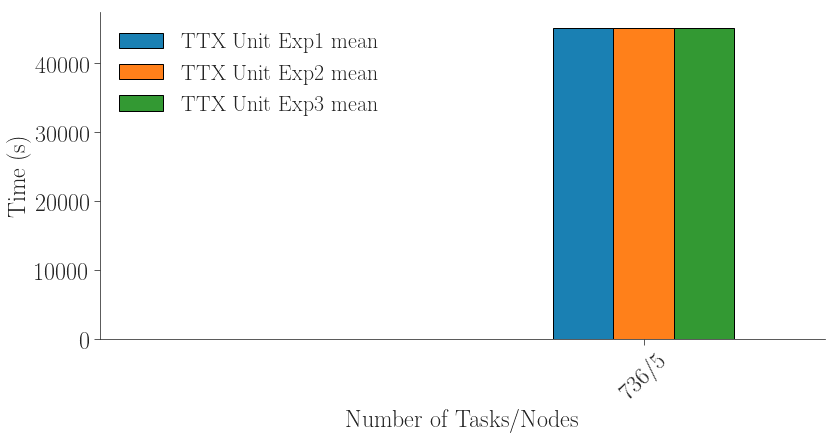

In [12]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh.plot.bar(
    x = 'nunitnode', 
    y = ['TTX Unit Exp1 mean', 'TTX Unit Exp2 mean', 'TTX Unit Exp3 mean'], 
#     yerr= 'TTX Unit std',
#     logy=True,
#     stacked=True,
    ax = ax, color = [tableau20[0], tableau20[2],  tableau20[4]], rot = 45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-1.5)

plt.savefig('figures/paper_hyperrct_weak_scaling_ttx_subagent.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_hyperrct_weak_scaling_ttx_subagent.png', dpi=300, bbox_inches='tight')

In [13]:
# oh4_prrte.rename({'sending launch msg mean': 'pending app launch $>$ sending launch msg'}, axis='columns', inplace=True)
# oh4_prrte.rename({'prte running 0 mean'    : 'sending launch msg $>$ running'}, axis='columns', inplace=True)
# oh4_prrte.rename({'notify completed mean'  : 'normally terminated $>$ notify completed'}, axis='columns', inplace=True)

# oh4_prrte['other'] = (oh4_prrte['pending allocation mean']        + \
#                       oh4_prrte['allocation complete mean']       + \
#                       oh4_prrte['pending daemon launch mean']     + \
#                       oh4_prrte['all daemons reported mean']      + \
#                       oh4_prrte['vm ready mean']                  + \
#                       oh4_prrte['pending mapping mean']           + \
#                       oh4_prrte['prte map complete mean']         + \
#                       oh4_prrte['pending final system prep mean'] + \
#                       oh4_prrte['pending app launch mean']        + \
#                       oh4_prrte['launch complete mean']           + \
#                       oh4_prrte['prte running 1 mean']            + \
#                       oh4_prrte['prte running 2 mean']            + \
#                       # oh4_prrte['iof complete mean']            + \
#                       oh4_prrte['waitpid fired mean']             + \
#                       oh4_prrte['normally terminated 0 mean']     + \
#                       oh4_prrte['normally terminated 1 mean']     + \
#                       oh4_prrte['normally terminated 2 mean'])

In [14]:
# fig, ax = fig_setup(figsize=(13,4))

# oh4_prrte.plot.bar(x='nunitnode', 
#                    y=[
# #                       'pending allocation mean', 
# #                       'allocation complete mean', 
# #                       'pending daemon launch mean', 
# #                       'all daemons reported mean', 
# #                       'vm ready mean', 
# #                       'pending mapping mean', 
# #                       'prte map complete mean', 
# #                       'pending final system prep mean', 
# #                       'pending app launch mean', 
#                       'pending app launch $>$ sending launch msg', #'sending launch msg mean', 
#                       'sending launch msg $>$ running',            # 'prte running 0 mean', 
# #                       'launch complete mean', 
# #                       'prte running 1 mean', 
# #                       'prte running 2 mean', 
# #                       'iof complete mean', 
# #                       'waitpid fired mean', 
# #                       'normally terminated 0 mean',
# #                       'normally terminated 1 mean', 
# #                       'normally terminated 2 mean', 
#                       'normally terminated $>$ notify completed', # 'notify completed mean',
#                       'other'],
# #                  yerr=oh4_prrte.filter(like='std'),
#                    stacked=True, 
# #                  logy=True, 
#                    width=0.5, color=[tableau20[12],tableau20[8],tableau20[16],tableau20[20]], ax=ax, rot=45)

# ax.set_xlabel('Number of Tasks/Nodes')
# ax.set_ylabel('Time (s)')

# plt.savefig('figures/paper_prrte_weak_scaling_prrte_events.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('figures/paper_prrte_weak_scaling_prrte_events.png', dpi=300, bbox_inches='tight')

In [15]:
# Load sessions for Synapse experiment 1
ws_sras_exp1 = load_sessions_units(
    '../data',       # session directory  
    exp1_sessions,   # sessions
    sorted(exp1_sessions.nunit.unique().tolist()) # session nunits
)

From ../data/exp1/re.session.login3.hrlee.018129.0000/re.session.login3.hrlee.018129.0000.json


In [16]:
# Load sessions for Synapse experiment 1
ws_sras_exp2 = load_sessions_units(
    '../data',       # session directory  
    exp2_sessions,   # sessions
    sorted(exp2_sessions.nunit.unique().tolist()) # session nunits
)

From ../data/exp2/re.session.login3.hrlee.018130.0000/re.session.login3.hrlee.018130.0000.json


In [17]:
# Load sessions for Synapse experiment 1
ws_sras_exp3 = load_sessions_units(
    '../data',       # session directory  
    exp3_sessions,   # sessions
    sorted(exp3_sessions.nunit.unique().tolist()) # session nunits
)

From ../data/exp3/re.session.login1.hrlee.018133.0002/re.session.login1.hrlee.018133.0002.json


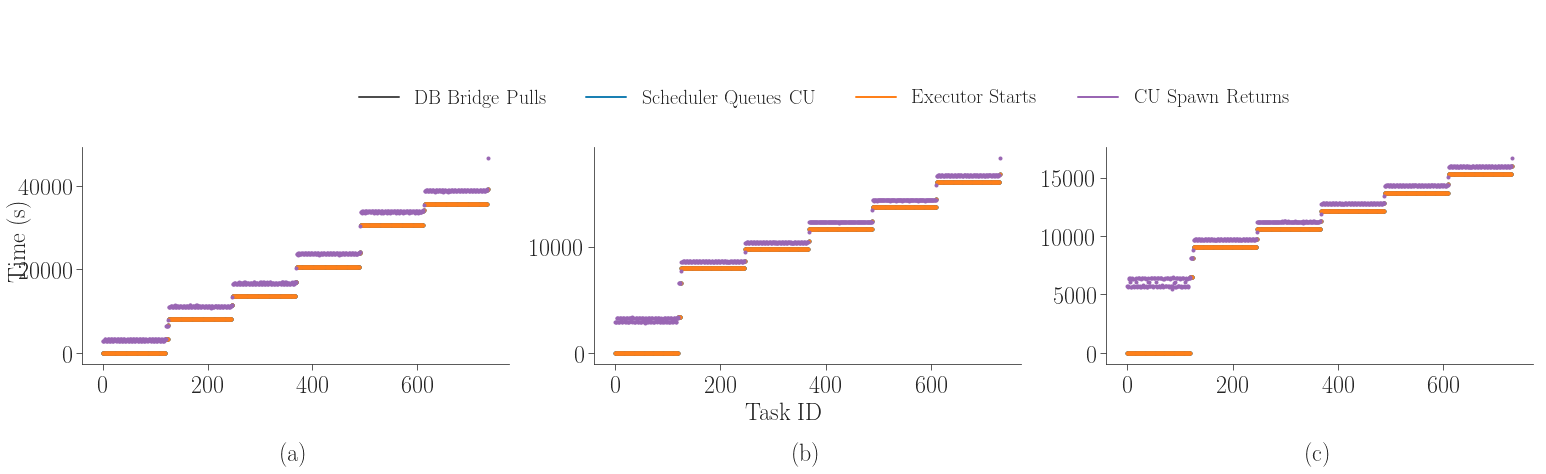

In [18]:
exps = [ws_sras_exp1, ws_sras_exp2, ws_sras_exp3]
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, len(exps), sharex='col', figsize=(fwidth,fhight))#, sharey='row')

i = 0
j = 'a'
for exp in exps:
    session  = exp[exp.keys()[0]][0]

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    
    # 'Executable Starts'       , 'Executable Stops'     ,
    
    df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
             'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
             'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
             'CU Spawns Executable'      , 'CU Spawn Returns'        ,
             'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
             'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
    df = df.dropna(axis=1, how='all')
    df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
#     unode = np.ceil(nunit/42.0)+1
#     nnode = unode+(int(np.ceil(unode/168.0)))
#     ax.title.set_text('%s/%s Tasks/Nodes' % (nunit, int(nnode)))

    # Plot data
    ax.scatter(df['DB Bridge Pulls'].index    , df['DB Bridge Pulls']    , marker='.', color=tableau20[18]) # Agent Scheduling Component
    ax.scatter(df['Scheduler Queues CU'].index, df['Scheduler Queues CU'], marker='.', color=tableau20[0] ) # Agent Scheduling Component
    ax.scatter(df['Executor Starts'].index    , df['Executor Starts']    , marker='.', color=tableau20[2] ) # Agent Executing Component
    # ax.scatter(df['Executable Starts'].index  , df['Executable Starts']  , marker='.', color=tableau20[4] ) # Synapse
    # ax.scatter(df['Executable Stops'].index   , df['Executable Stops']   , marker='.', color=tableau20[6] ) # Synapse, orterun [orterun spawner]
    ax.scatter(df['CU Spawn Returns'].index   , df['CU Spawn Returns']   , marker='.', color=tableau20[8] ) # CU script
    
    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.085, 0.55, 'Time (s)', va='center', rotation='vertical', fontsize=24)
fig.text(0.5, -0.07, 'Task ID', ha='center', fontsize=24)
    
# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[18]),
                mpl.lines.Line2D([], [], color=tableau20[0] ), 
                mpl.lines.Line2D([], [], color=tableau20[2] ),
                # mpl.lines.Line2D([], [], color=tableau20[4] ), 
                # mpl.lines.Line2D([], [], color=tableau20[6] ),
                mpl.lines.Line2D([], [], color=tableau20[8] )
           ),
           (
                'DB Bridge Pulls',
                'Scheduler Queues CU',
                'Executor Starts',
                # 'Executable Starts',
                # 'Executable Stops',
                'CU Spawn Returns',
           ), 
           'upper center',
           bbox_to_anchor=(0.44, 1.4),
           fontsize=20,
           ncol=6)

plt.savefig('figures/paper_prrte_weak_scaling_rp_events_timeline.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_weak_scaling_rp_events_timeline.png', dpi=300, bbox_inches='tight')